<a href="https://colab.research.google.com/github/victoria0631/ML/blob/main/LAB4_VBDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA through Singular Value Decomposition

In [3]:
import numpy as np
# Defined 3 points in 2D-space:
X=np.array([[2, 1, 0],[4, 3, 0]])
# Calculate the covariance matrix:
mu = np.mean(X, axis=1, keepdims=True)
Xc = X - mu
R = (1/3) * Xc @ Xc.T
# Calculate the SVD decomposition and new basis vectors:
[U,D,V]=np.linalg.svd(R)  # call SVD decomposition
u1=U[:,0] # new basis vectors
u2=U[:,1]

# Calculate the coordinates in new orthonormal basis:
Xi = U.T @ Xc
Xi1 = u1.T @ Xc
# Calculate the approximation of the original from new basis
#print(Xi1[:,None]) # add second dimention to array and test it
X_reconstructed = U @ Xi + mu #reconstitution 2D

# Check that you got the original
print("Original X:\n", X)
print("Reconstructed X:\n", X_reconstructed)

print("Difference:\n", X - X_reconstructed)

Original X:
 [[2 1 0]
 [4 3 0]]
Reconstructed X:
 [[ 2.00000000e+00  1.00000000e+00 -6.66133815e-16]
 [ 4.00000000e+00  3.00000000e+00 -4.44089210e-16]]
Difference:
 [[-4.44089210e-16 -2.22044605e-16  6.66133815e-16]
 [ 0.00000000e+00  0.00000000e+00  4.44089210e-16]]


# PCA on Iris data

In [4]:
# Load Iris dataset as in the last PC lab:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[:])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


<function matplotlib.pyplot.show(close=None, block=None)>

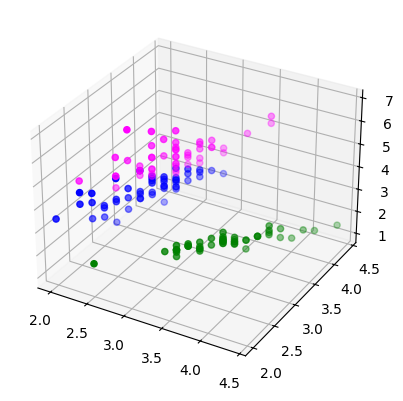

In [5]:
# We have 4 dimensions of data, plot the first three colums in 3D
X=iris.data
y=iris.target
import matplotlib.pyplot as plt
axes1=plt.axes(projection='3d')
axes1.scatter3D(X[y==0,1],X[y==0,1],X[y==0,2],color='green')
axes1.scatter3D(X[y==1,1],X[y==1,1],X[y==1,2],color='blue')
axes1.scatter3D(X[y==2,1],X[y==2,1],X[y==2,2],color='magenta')
plt.show


[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


<function matplotlib.pyplot.show(close=None, block=None)>

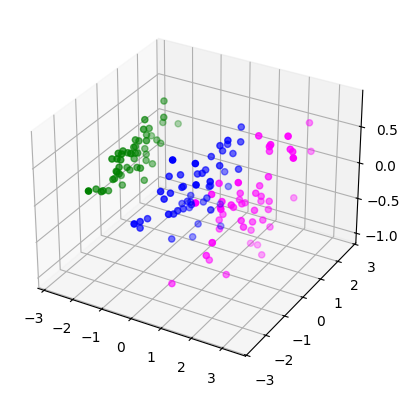

In [9]:
# Pre-processing is an important step, you can try either StandardScaler (zero mean, unit variance of features)
# or MinMaxScaler (to interval from 0 to 1)
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
Xscaler = StandardScaler()
Xpp=Xscaler.fit_transform(X)

# define PCA object (three components), fit and transform the data
pca = decomposition.PCA(n_components=3)
pca.fit(Xpp)
Xpca = pca.transform(Xpp)
print(pca.get_covariance())
# you can plot the transformed feature space in 3D:
axes2=plt.axes(projection='3d')
axes2.scatter3D(Xpca[y==0,0],Xpca[y==0,1],Xpca[y==0,2],color='green')
axes2.scatter3D(Xpca[y==1,0],Xpca[y==1,1],Xpca[y==1,2],color='blue')
axes2.scatter3D(Xpca[y==2,0],Xpca[y==2,1],Xpca[y==2,2],color='magenta')
plt.show


In [10]:
# Compute pca.explained_variance_ and pca.explained_cariance_ratio_values
pca.explained_variance_

array([2.93808505, 0.9201649 , 0.14774182])

In [11]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922])

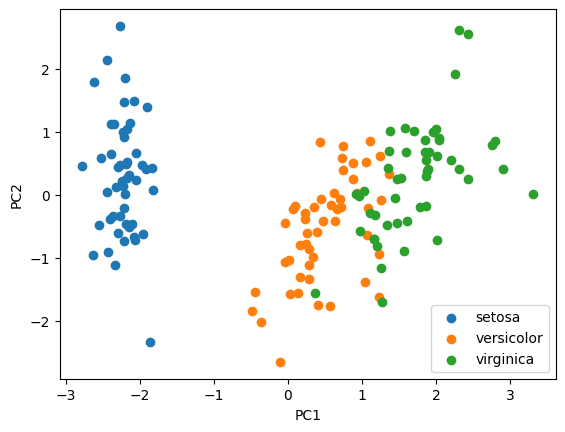

In [13]:
# Plot the principal components in 2D, mark different targets in color
plt.figure()

for i in range(3):
    plt.scatter(Xpca[y == i, 0], Xpca[y == i, 1], label=iris.target_names[i])

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

# KNN classifier

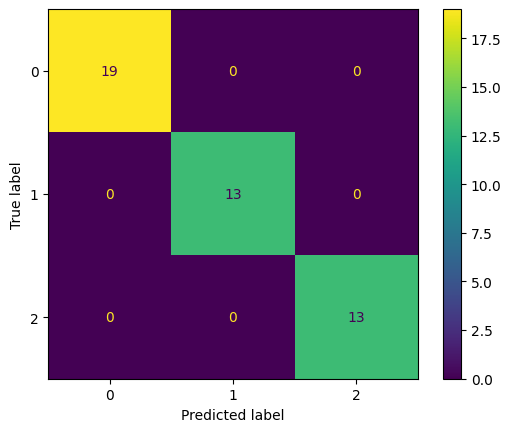

In [19]:
# Import train_test_split as in last PC lab, split X (original) into train and test, train KNN classifier on full 4-dimensional X
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train, y_train)
Ypred=knn1.predict(X_test)
# Import and show confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)



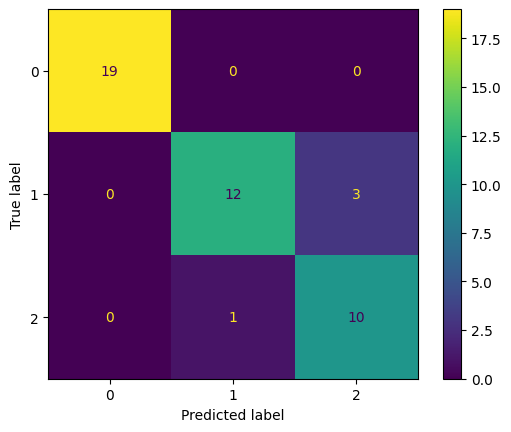

In [27]:
# Now do the same (data set split, KNN, confusion matrix), but for PCA-transformed data (1st two princ:)
# Compare the results with full dataset

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(Xpca[:, :2], y, test_size=0.3)

knn2 = KNeighborsClassifier(n_neighbors=3)
knn2.fit(X_train_pca, y_train_pca)

Ypred_pca = knn2.predict(X_test_pca)

confusion_matrix(y_test_pca, Ypred_pca)
ConfusionMatrixDisplay.from_predictions(y_test_pca, Ypred_pca)

plt.show()

Précision 4D Complet : 100.00%
Précision 2D PCA     : 95.56%
Précision 2D Brut    : 75.56%


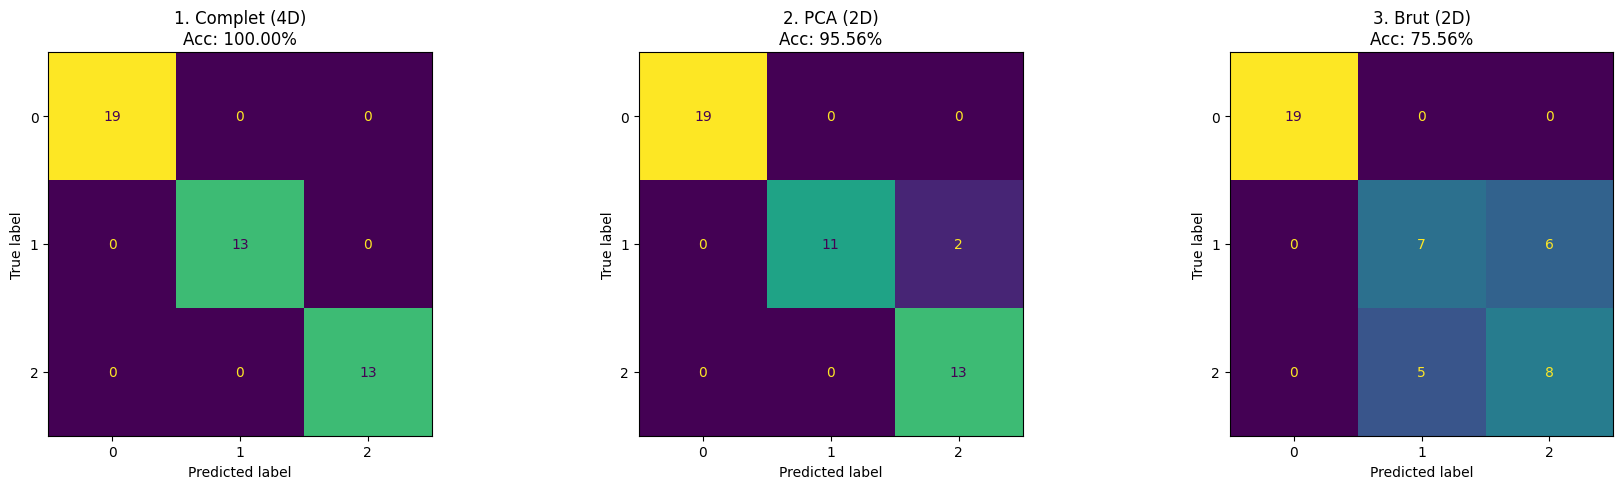

In [30]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

seed = 42
test_size = 0.3
k = 3


# On utilise X (original) et y
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=test_size, random_state=seed)

knn_full = KNeighborsClassifier(n_neighbors=k)
knn_full.fit(X_train1, y_train1)
y_pred_full = knn_full.predict(X_test1)
acc_full = accuracy_score(y_test1, y_pred_full)

X_pca_2d = Xpca[:, :2]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_pca_2d, y, test_size=test_size, random_state=seed)

knn_pca = KNeighborsClassifier(n_neighbors=k)
knn_pca.fit(X_train2, y_train2)
y_pred_pca = knn_pca.predict(X_test2)
acc_pca = accuracy_score(y_test2, y_pred_pca)


X_raw_2d = X[:, :2]

X_train3, X_test3, y_train3, y_test3 = train_test_split(X_raw_2d, y, test_size=test_size, random_state=seed)

knn_raw = KNeighborsClassifier(n_neighbors=k)
knn_raw.fit(X_train3, y_train3)
y_pred_raw = knn_raw.predict(X_test3)
acc_raw = accuracy_score(y_test3, y_pred_raw)

# result:
print(f"Précision 4D Complet : {acc_full:.2%}")
print(f"Précision 2D PCA     : {acc_pca:.2%}")
print(f"Précision 2D Brut    : {acc_raw:.2%}")

fig, ax = plt.subplots(1, 3, figsize=(18, 5))

ConfusionMatrixDisplay.from_predictions(y_test1, y_pred_full, ax=ax[0], colorbar=False)
ax[0].set_title(f"1. Complet (4D)\nAcc: {acc_full:.2%}")

ConfusionMatrixDisplay.from_predictions(y_test2, y_pred_pca, ax=ax[1], colorbar=False)
ax[1].set_title(f"2. PCA (2D)\nAcc: {acc_pca:.2%}")

ConfusionMatrixDisplay.from_predictions(y_test3, y_pred_raw, ax=ax[2], colorbar=False)
ax[2].set_title(f"3. Brut (2D)\nAcc: {acc_raw:.2%}")

plt.tight_layout()
plt.show()

Matrice de confusion - Données Originales (2 premières colonnes) :


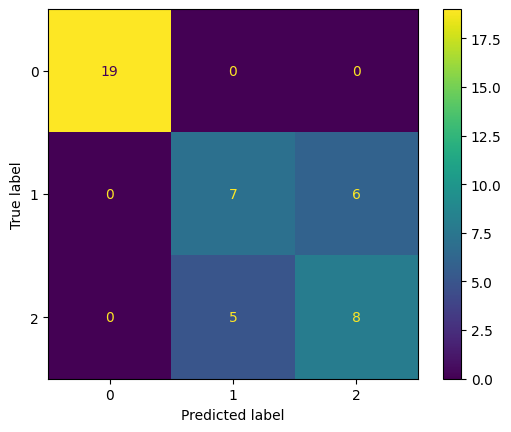

In [31]:
# Now do the same, but use only 2-dimensional data of original X (first two columns)
X_raw_2d = X[:, :2]

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_raw_2d, y, test_size=0.3, random_state=42)

knn_raw = KNeighborsClassifier(n_neighbors=3)
knn_raw.fit(X_train_raw, y_train)

y_pred_raw = knn_raw.predict(X_test_raw)

print("Matrice de confusion - Données Originales (2 premières colonnes) :")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_raw)